# Imports

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Task 1


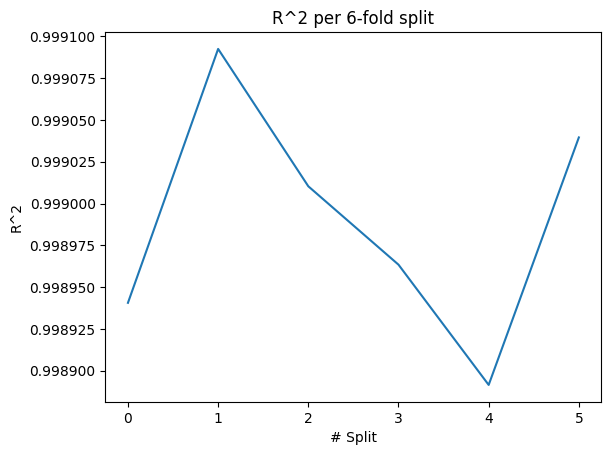

Mean: 0.9989896443678249
Standard Deviation: 6.608118371529651e-05
95% Confidence Interval: [0.99889767 0.99908583]


In [68]:
file_path = '/content/drive/My Drive/ML_24-25/Data/advertising_and_sales_clean.csv'
data = pd.read_csv(file_path)

features = ["tv", "radio", "social_media"]
target = "sales"
X = data[features]
y = data[target]
kf = KFold(n_splits=6, shuffle=True, random_state=5)

# r2_scores = np.zeros(6)
# model = LinearRegression()
# for i, (train_index, test_index) in enumerate(kf.split(X)):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#     model.fit(X_train, y_train)
#     r2_scores[i] = model.score(X_test, y_test)

r2_scores = cross_val_score(LinearRegression(), X, y, cv=kf)

plt.plot(r2_scores)
plt.title("R^2 per 6-fold split")
plt.xlabel("# Split")
plt.ylabel("R^2")
plt.show()

print(f"Mean: {np.mean(r2_scores)}")
print(f"Standard Deviation: {np.std(r2_scores)}")
print(f"95% Confidence Interval: {np.quantile(r2_scores, [0.025, 0.975])}")

# Task 2

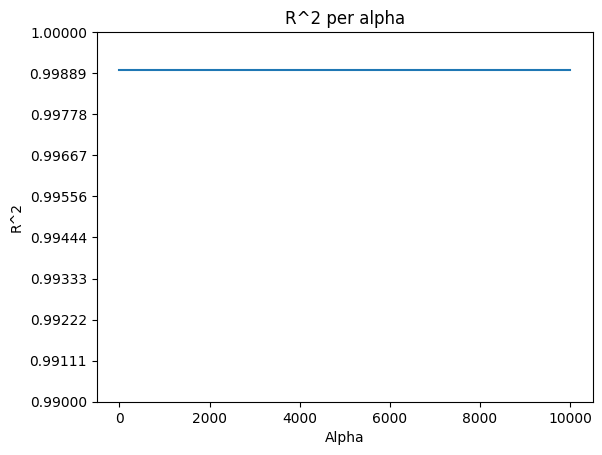

Ridge scores per alpha: 0.1: 0.9990152104759369, 1.0: 0.9990152104759373, 10.0: 0.9990152104759419, 100.0: 0.9990152104759871, 1000.0: 0.9990152104764387, 10000.0: 0.9990152104809561


In [69]:
features = ["tv", "radio", "social_media"]
target = "sales"
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]

train_scores = np.zeros(len(alphas))
test_scores = np.zeros(len(alphas))
for i, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    train_scores[i] = ridge.score(X_train, y_train)
    test_scores[i] = ridge.score(X_test, y_test)


plt.plot(alphas, train_scores)
plt.ylim([0.99, 1.0])
plt.yticks(np.linspace(0.99, 1.0, 10))
plt.xlabel("Alpha")
plt.ylabel("R^2")
plt.title("R^2 per alpha")
plt.show()

print("Ridge scores per alpha: " + ", ".join([f"{alpha}: {test_r2}" for alpha, test_r2 in zip(alphas, test_scores)]))

# The score across all alpha values is high and practicaly the same (For test set), so I would guess that there is no evidence of overfitting and underfitting
# Heavy penalization does not affect model performance

# Task 3

Lasso coefficients per feature: {'tv': 3.5626, 'radio': -0.004, 'social_media': 0.005}


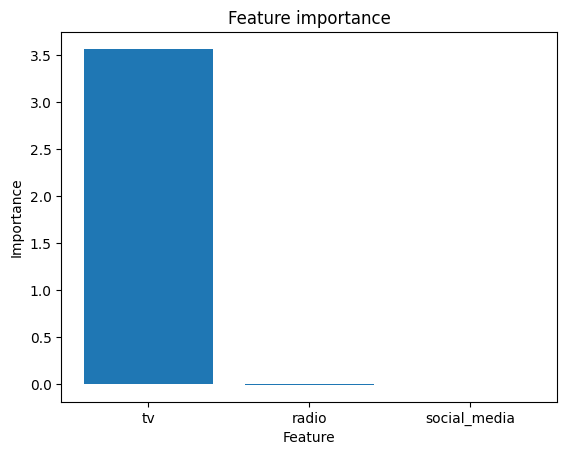

In [70]:
X = data[['tv', 'radio', 'social_media']] #I don't  know how to handle the non-numeric feature 'influecer'
y = data['sales']

lasso = Lasso()
lasso.fit(X, y)
# print(lasso.coef_.shape)

coefficients = {feature: round(coef, 4) for feature, coef in zip(X.columns, lasso.coef_)}

print("Lasso coefficients per feature:", coefficients)
# I am not sure what the issue is with my coefficient matching, but the barplot is slightly (almost negligibly) different.
plt.bar(coefficients.keys(), coefficients.values())
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature importance')
plt.show()

#Tv is the most important feature for predicting sales

# Task 4

### Answer C

The main consideration is that **false negatives** are extremely important to minimize in case A, so I would prioritize **recall** in this scenario.


For case B (more context is needed), I assume we also want a balance of good **precision** and **recall**, so I would suggest using the **F1-score**.


Answer C initially sounded unusual to me, but I’m guessing the limited budget is a factor here. If there’s a decent pool of high-value clients, then missing out on a few of them might not be as detrimental, given the budget constraints.


# Task 5

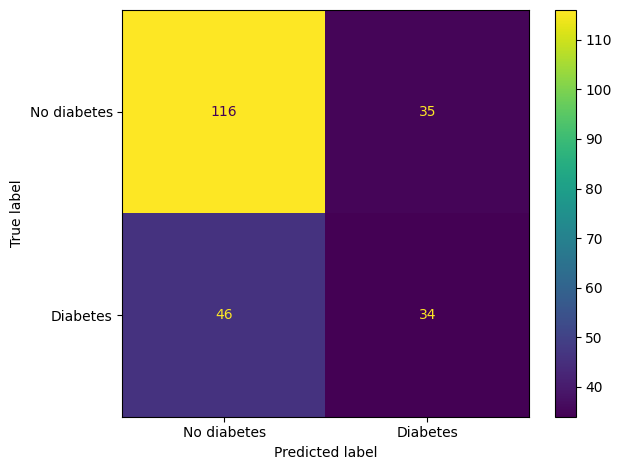

Classification Report:
               precision    recall  f1-score   support

 No diabetes       0.72      0.77      0.74       151
    Diabetes       0.49      0.42      0.46        80

    accuracy                           0.65       231
   macro avg       0.60      0.60      0.60       231
weighted avg       0.64      0.65      0.64       231



In [71]:
file_path = '/content/drive/My Drive/ML_24-25/Data/diabetes_clean.csv'
data = pd.read_csv(file_path)

X = data[['bmi', 'age']]
y = data['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

conf_matr = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,  display_labels=["No diabetes", "Diabetes"])
plt.tight_layout()
plt.show()

report = classification_report(y_test, y_pred, target_names=["No diabetes", "Diabetes"])
print("Classification Report:\n", report)

# True positive count -> 34
# False positive count -> 35
# f1 for 'No diabetes' is higher